# Part II - San Francisco Ford GoBike Services
## by Emmanuel Owoka

## Investigation Overview


> The goal of this investigation is for ford bike services to know how to improve their marketing strategies and where they should channel their insights by drawing insights from the following:
<ol>
    <li>Count of trips based on hour of the day</li>
    <li>Count of trips based on day of the week</li>
    <li>Duration of trips based on Age of members</li>
    <li>Count of trips based on user type</li>
</ol>


## Dataset Overview

> This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area. This dataset includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.The Ford GoBike services is a bike sharing transportation provided by Ford that is easy to use, enjoyable and convenient. The dataset contains the 2019 for the month of February records which has 183,412 records and 16 features. I am going to be carrying out exploratory and explanatory data analysis on the dataset.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime
import calendar
import math

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
ford_bikes_clean = pd.read_csv('201902_fordgobike_tripdata_clean.csv')

## Count of trips based on hour of the day

> It is observed that most trips are taken in the morning and in the afternoon than at night. This might mean that most riders prefer day rides to night rides, and most might have their engagements during the daytime.


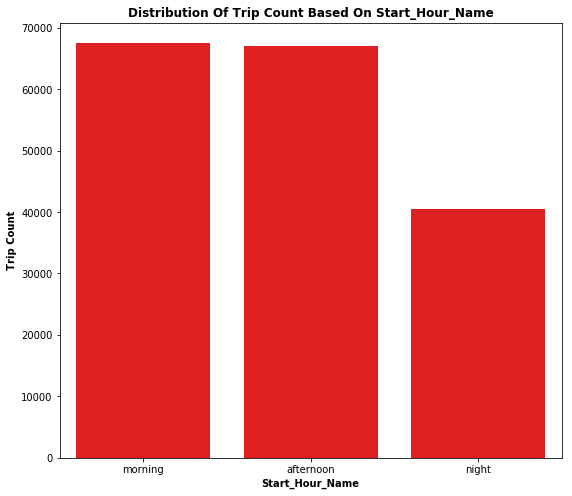

In [3]:
def countplot(ford_bikes_clean, column, order = None, color=None):
    plt.figure(figsize=[9,8])
    sb.countplot(data = ford_bikes_clean, x=column, color = color, order=order);
    plt.title(f'''Distribution of trip count based on {column}'''.title(), fontsize=12, weight ='bold')
    plt.xlabel(column.title(),fontsize=10, weight='bold')
    plt.ylabel('Trip Count'.title(),fontsize=10,weight='bold')
    
day_hour = ['morning', 'afternoon', 'night']
day_hour_order = pd.api.types.CategoricalDtype(ordered=True, categories=day_hour)
ford_bikes_clean['start_hour_name'] = ford_bikes_clean['start_hour_name'].astype(day_hour_order)

countplot(ford_bikes_clean, 'start_hour_name', color='red')

## Count of trips based on day of the week

>During the week, most trips are taken on Monday to Friday, with Thursday being the highest. There are less trips during the weekends

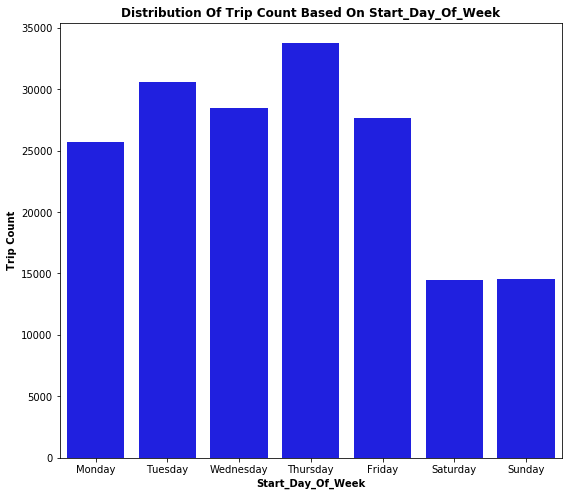

In [4]:
#day of the week
week_day = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
week_day_order = pd.api.types.CategoricalDtype(ordered=True, categories=week_day)
ford_bikes_clean['start_day_of_week'] = ford_bikes_clean['start_day_of_week'].astype(week_day_order)

countplot(ford_bikes_clean, 'start_day_of_week', color='blue')

## Duration of trips based on Age of members

>It is no surprise that the duration of the older members takes less time. Because of their age, they do not need long, tiring trips. The duration of trips for age group 18 to 29 takes roughly 27 to 28 minutes. At least younger people have more energy than the older ones to endure a long trip

Text(0.5,1,'Duration of trips based on Age of members')

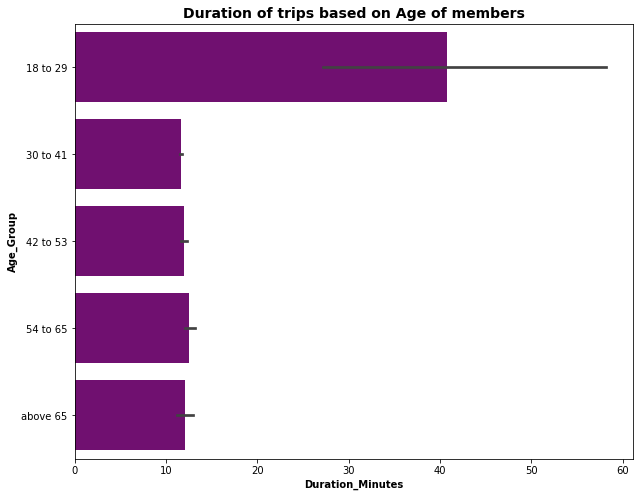

In [5]:
def barplots(ford_bikes_clean, column, x=None, color=None, order=None, hue=None):
    plt.figure(figsize=[10,8])
    sb.barplot(data = ford_bikes_clean, y=column, x=x, order=order, color=color, hue=hue);
    plt.ylabel(column.title(),fontsize=10,weight='bold')
    plt.xlabel(x.title(),fontsize=10,weight='bold')
    
#group the members according to age
age_group = pd.cut(x=ford_bikes_clean['member_Age'], bins=[0,18,41,53,65,89], labels = ['18 to 29', '30 to 41','42 to 53', '54 to 65', 'above 65'])

ford_bikes_clean.insert(22,'age_group', age_group)
    
barplots(ford_bikes_clean, 'age_group', x = 'duration_minutes', color = 'purple')
plt.title('Duration of trips based on Age of members', fontsize=14, weight='bold')

## Count of trips based on user type

>From the plot, subscribers go on trips more than customers. That means the bike services have more subscribers than customers, maybe the subscription price is reasonable enough and the customers might be tourists. 

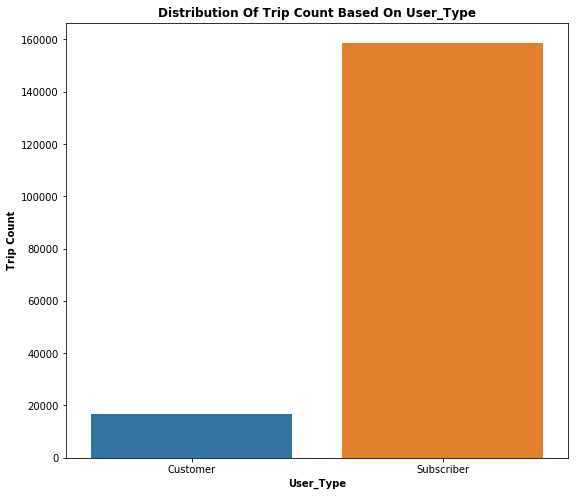

In [6]:
countplot(ford_bikes_clean,'user_type')

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [7]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck_slides.ipynb --to slides --no-input

[NbConvertApp] Converting notebook Part_II_slide_deck_slides.ipynb to slides
[NbConvertApp] Writing 355662 bytes to Part_II_slide_deck_slides.slides.html
